In [48]:
"""Varying all 3: b,c,h"""

'Varying all 3: b,c,h'

In [49]:
import numpy as np
import scipy
import pickle
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
from L96 import *
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
np.random.seed(123)
sns.set_style('darkgrid')


In [50]:
"""Two-Level Lorenz 96"""

# K = 4  # index for slow variables (total=4)
# J = 4 # index for fast variables (total=16)
# F = 20  # forcing
# b = 10
# c = 10
# h = 1


'Two-Level Lorenz 96'

In [51]:
"""Import Data"""

K = 4
J = 4
F = 10

filename = "data_generated/old/F_{}_i_500_T_51_dt_0.005_X_{}.pkl".format(F,K)
infile = open(filename,'rb')
out = pickle.load(infile)
infile.close()


In [52]:
"""Initial Conditions"""

X0 = np.random.randn(K)
Y0 = np.random.randn(J*K)

print(X0.shape)
print(Y0.shape)

(4,)
(16,)


In [53]:
n_iter = 500 #number of different parameter simulations
t = 21
dt = 0.005

b_ = np.random.uniform(5,15,n_iter)
c_ = np.random.uniform(5,15,n_iter)
h_ = np.random.uniform(0,2,n_iter)



In [54]:
# fig, ax = plt.subplots(1, 3, figsize=(12,6))

# sns.distplot(h_, hist=False, ax=ax[0]).set_title('h')
# sns.distplot(b_, hist=False, ax=ax[1]).set_title('b')
# sns.distplot(c_, hist=False, ax=ax[2]).set_title('c')

# plt.suptitle('True Distributions', fontsize=14)
# plt.show()

In [55]:
%%time

# out = []
# X_ = []
# Y_ = []

# for i in range(n_iter):
#     print('n_iter: ', i)
#     h = h_[i] 
#     c = c_[i] 
#     b = b_[i]
#     l96_ref = L96TwoLevel(K=K, J=J, X_init=X0, Y_init=Y0, h=h, c=c, b=b, save_dt=dt, noYhist=False)
#     l96_ref.iterate(t)
    
#     out.append(l96_ref.history)
    
    

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 6.91 µs


In [56]:
# """Pickle Output Data"""

# output = [out, b_, c_, h_]

# outfile = open("F_20_i_500_T_51_dt_0.005_X_4.pkl", "wb" )
# pickle.dump(out, outfile)
# outfile.close()


In [57]:
X_ = []
Y_ = []

for i in range(n_iter):
    X_.append((out[i]).X.values)
    Y_.append((out[i]).Y.values)
    

In [58]:
"""Discard Initial Transient Steps"""

X_ = np.array(X_)
print('X_ shape: ', X_.shape)
X_ = X_[:,:10000,:]
print('X_shape after discarding: ', X_.shape)

Y_ = np.array(Y_)
print('Y_ shape: ', Y_.shape)
Y_ = Y_[:,:10000,:]
print('Y_shape after discarding: ', Y_.shape)



X_ shape:  (500, 10201, 4)
X_shape after discarding:  (500, 10000, 4)
Y_ shape:  (500, 10201, 16)
Y_shape after discarding:  (500, 10000, 16)


In [59]:
"Extracting initial 10 values"

snapshot_len = 10

X_ = X_[:,100:110,:]
Y_ = Y_ = Y_[:,100:110,:]

print(X_.shape)
print(Y_.shape)

(500, 10, 4)
(500, 10, 16)


In [60]:
"Using only X1"

X_ = X_[:,:,0]
print(X_.shape)

(500, 10)


In [61]:
"Reshape h"

print(h_.shape)    
h_truth = np.array(h_).reshape(len(h_),1)
print('h_truth shape: ', h_truth.shape)


(500,)
h_truth shape:  (500, 1)


In [62]:
# """Reshaping Data"""

# X = X_.reshape(X_.shape[0]*X_.shape[1], K)
# print('X reshaped: ', X.shape)
# X_last = X_[:,-1,:]
# print('X_last: ', X_last.shape)


# Y = Y_.reshape(Y_.shape[0]*Y_.shape[1], K*J)
# print('Y reshaped: ', Y.shape)
# Y_last = Y_[:,-1,:]
# print('Y_last: ', Y_last.shape)


# h_truth_ = []
# b_truth_ = []
# c_truth_ = []

# for i in range(n_iter):
#     temp = np.ones(X_.shape[1])*h_[i]
#     temp2 = np.ones(X_.shape[1])*b_[i]
#     temp3 = np.ones(X_.shape[1])*c_[i]
#     h_truth_.append(temp)
#     b_truth_.append(temp2)
#     c_truth_.append(temp3)
    
# h_truth = h_truth_.reshape(n_iter*X_.shape[1],1)
# print('h_truth (reshaped): ', h_truth.shape)
# h_truth_last = h_.reshape(-1,1)
# print('h_truth_last: ', h_truth_last.shape)

# b_truth_ = np.array(b_truth_)
# print('b shape: ', b_truth_.shape)
# b_truth = b_truth_.reshape(n_iter*X_.shape[1],1)
# print('b_truth (reshaped): ', h_truth.shape)
# b_truth_last = b_.reshape(-1,1)
# print('b_truth_last: ', b_truth_last.shape)

# c_truth_ = np.array(c_truth_)
# print('c shape: ', c_truth_.shape)
# c_truth = c_truth_.reshape(n_iter*X_.shape[1],1)
# print('c_truth (reshaped): ', c_truth.shape)
# c_truth_last = h_.reshape(-1,1)
# print('c_truth_last: ', c_truth_last.shape)


In [63]:
# plt.figure(figsize=(6,8), frameon=True)
# plt.imshow(X[:1000, :],cmap='RdBu', aspect='auto', alpha=0.6)
# plt.xticks([0,1,2,3])
# plt.grid()
# plt.colorbar()
# #plt.show()

# plt.savefig("colormap.pdf", bbox_inches="tight")

In [64]:
X_in = X_
dataset = np.hstack((X_in,h_truth))

np.random.shuffle(dataset)
print(dataset.shape)


(500, 11)


In [65]:
# X_in = np.hstack((X,Y))
# dataset = np.hstack((X_in,h_truth))
# np.random.shuffle(dataset)
# print(dataset.shape)


In [66]:
n_data = dataset.shape[0]
split = int(0.6*n_data)


X_train = dataset[:split, :10]
y_train = dataset[:split, 10]
X_test = dataset[split:, :10]
y_test = dataset[split:, 10]

In [67]:
print(X_train.shape)
print(X_test.shape)

print(y_train.shape)
print(y_test.shape)

(300, 10)
(200, 10)
(300,)
(200,)


In [68]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline


In [69]:
from sklearn.preprocessing import StandardScaler

# Define the scaler 
scaler = StandardScaler().fit(X_train)
# Scale the train set
X_train = scaler.transform(X_train)
# Scale the test set
X_test = scaler.transform(X_test)


In [70]:
from keras.models import Sequential

# Import `Dense` from `keras.layers`
from keras.layers import Dense

# Initialize the constructor
model = Sequential()

# Add an input layer 
model.add(Dense(64, activation='relu', input_shape=(snapshot_len,)))

model.add(Dense(32, activation='relu'))

# Add one hidden layer 
model.add(Dense(16, activation='relu'))

# Add an output layer 
model.add(Dense(1))

In [71]:
model.compile(loss='mse',
              optimizer='adam',
              metrics=['mae'])

In [72]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=50, batch_size=32, verbose=1)

Train on 240 samples, validate on 60 samples
Epoch 1/50
240/240 [==============================] - 1s 3ms/step - loss: 0.4951 - mae: 0.5635 - val_loss: 0.4233 - val_mae: 0.4840
Epoch 2/50
240/240 [==============================] - 0s 109us/step - loss: 0.4312 - mae: 0.5183 - val_loss: 0.3374 - val_mae: 0.4333
Epoch 3/50
240/240 [==============================] - 0s 111us/step - loss: 0.3300 - mae: 0.4521 - val_loss: 0.2861 - val_mae: 0.4009
Epoch 4/50
240/240 [==============================] - 0s 102us/step - loss: 0.2990 - mae: 0.4337 - val_loss: 0.2437 - val_mae: 0.3756
Epoch 5/50
240/240 [==============================] - 0s 114us/step - loss: 0.2465 - mae: 0.4044 - val_loss: 0.2021 - val_mae: 0.3596
Epoch 6/50
240/240 [==============================] - 0s 104us/step - loss: 0.2117 - mae: 0.3787 - val_loss: 0.1998 - val_mae: 0.3456
Epoch 7/50
240/240 [==============================] - 0s 114us/step - loss: 0.1907 - mae: 0.3599 - val_loss: 0.1802 - val_mae: 0.3365
Epoch 8/50
240/240 

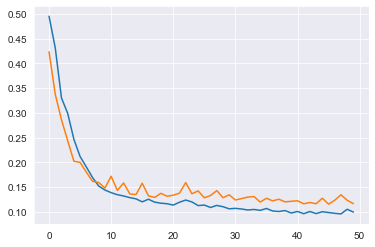

In [73]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])


In [74]:
score = model.evaluate(X_test, y_test)
print(score)

200/200 [==============================] - 0s 45us/step
[0.11505694150924682, 0.25482091307640076]


In [75]:
pred = model.predict(X_test)

In [76]:
print(pred.shape)
print(y_test.shape)

(200, 1)
(200,)


In [78]:
"""Calcualte R2 Score"""
import sklearn

print(sklearn.metrics.r2_score(y_test, pred, sample_weight=None, multioutput='uniform_average'))
scipy.stats.pearsonr(y_test, pred[:,0])[0]

0.6764510785171964


0.8224775092953946

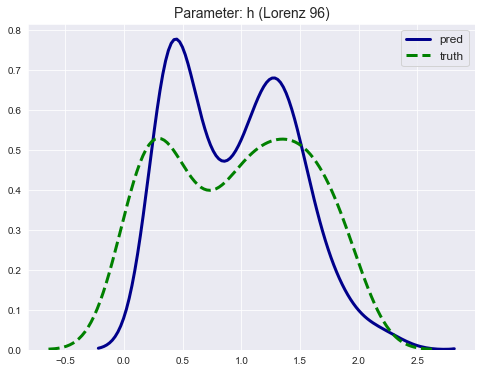

In [79]:
plt.figure(figsize=(8,6))

sns.distplot(pred, hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3}, label='pred')

sns.distplot(y_test, hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3, 'linestyle': '--'}, label='truth')


plt.title('Parameter: h (Lorenz 96)', fontsize=14)
plt.legend(fontsize=12)
plt.show()


In [81]:
def kl(p, q):
    """Kullback-Leibler divergence D(P || Q) for discrete distributions
    Parameters
    ----------
    p, q : array-like, dtype=float, shape=n
    Discrete probability distributions.
    """
    p = np.asarray(p, dtype=np.float)
    q = np.asarray(q, dtype=np.float)

    return np.sum(np.where(p != 0, p * np.log(p / q), 0))

0.0

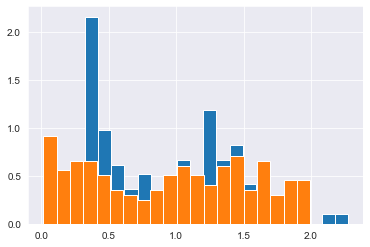

In [110]:
hist_pred = plt.hist(pred, bins=20, normed=True)
hist_test = plt.hist(y_test, bins=20, normed=True)

density, bins, patches = hist_pred
widths = bins[1:] - bins[:-1]
pdf_pred = (density * widths).sum()

density, bins, patches = hist_test
widths = bins[1:] - bins[:-1]
pdf_test = (density * widths).sum()

kl(pdf_pred, pdf_test)

In [85]:
h = pred[0]
b = b_[0]
c = c_[0]

l96_ref = L96TwoLevel(K=K, J=J, X_init=X0, Y_init=Y0, h=h, c=c, b=b, save_dt=dt, noYhist=False)
l96_ref.iterate(t)
    
out = l96_ref.history
dnn_x = out.X.values
dnn_x.shape


(4201, 4)

In [86]:
h = y_test[0]
b = b_[0]
c = c_[0]

l96_ref = L96TwoLevel(K=K, J=J, X_init=X0, Y_init=Y0, h=h, c=c, b=b, save_dt=dt, noYhist=False)
l96_ref.iterate(t)
    
out = l96_ref.history

dnn_x_ = out.X.values
dnn_x_.shape


(4201, 4)

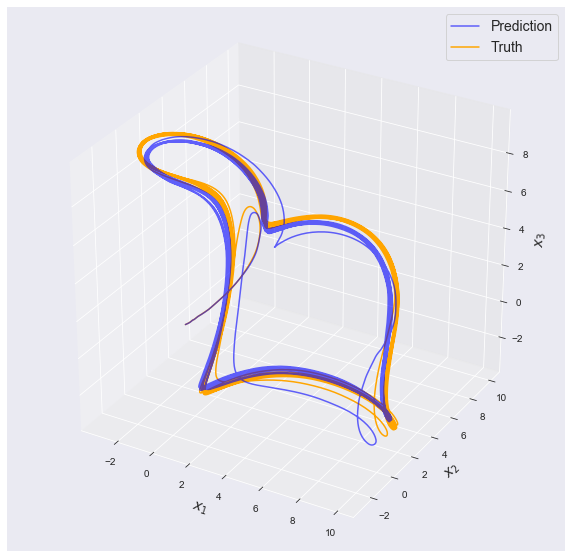

In [87]:
fig = plt.figure(figsize=(10,10))

from_to = range(4000)

ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot(dnn_x[from_to,0],dnn_x[from_to,1], dnn_x[from_to,2], 'b', alpha=0.6, markersize=3, label='Prediction', zorder=3)
ax.plot(dnn_x_[from_to,0],dnn_x_[from_to,1], dnn_x_[from_to,2], 'orange', markersize=3, label='Truth', zorder=2)
ax.set_xlabel('$x_1$', fontsize=14)
ax.set_ylabel('$x_2$', fontsize=14)
ax.set_zlabel('$x_3$', fontsize=14)
ax.legend(fontsize=14)


#plt.savefig('trial.pdf', bbox_inches='tight')
plt.show()

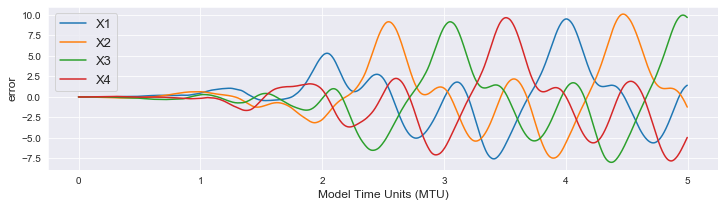

In [91]:
from_to = np.arange(1000)
mtu = np.arange(0,1000)*dt

plt.figure(figsize=(12,3))
plt.plot(mtu, dnn_x[from_to,0]-dnn_x_[from_to,0], label='X1')
plt.plot(mtu, dnn_x[from_to,1]-dnn_x_[from_to,1], label='X2')
plt.plot(mtu, dnn_x[from_to,2]-dnn_x_[from_to,2], label='X3')
plt.plot(mtu, dnn_x[from_to,3]-dnn_x_[from_to,3], label='X4')
plt.ylabel('error', fontsize=12)
plt.xlabel('Model Time Units (MTU)', fontsize=12)
#plt.title('X variable (from predicted h) error growth')
plt.legend(fontsize=13)
plt.show()

## Gaussian Processes

In [92]:
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline
from sklearn.gaussian_process import GaussianProcessRegressor 
from sklearn.gaussian_process.kernels import DotProduct, WhiteKernel, RationalQuadratic
from sklearn.gaussian_process.kernels import RBF, Matern, ConstantKernel
from mpl_toolkits.mplot3d import Axes3D


In [93]:
print(y_train.shape)
print(X_train.shape)

(300,)
(300, 10)


In [94]:
# Instantiate a Gaussian Process model

#kernel = DotProduct() + WhiteKernel()
kernel = 1**2*RationalQuadratic(alpha=1, length_scale=1) + 1**2*Matern(1)
gp = GaussianProcessRegressor(kernel=kernel,n_restarts_optimizer=9)
gp.fit(X_train, y_train)
y_pred, sigma = gp.predict(X_test, return_std=True)
#gp.score(X_test+Xtrain, y_test)


In [95]:
gp.kernel_

1.74**2 * RationalQuadratic(alpha=0.00314, length_scale=0.0573) + 0.267**2 * Matern(length_scale=0.295, nu=1.5)

In [96]:
xx = np.arange(0,50,1)

print(xx.shape)
print(y_pred.shape)
print(sigma.shape)

upper = y_pred+sigma
lower = y_pred-sigma

#upper = upper.reshape(500,)
#lower = lower.reshape(500,)

print(upper.shape)
print(lower.shape)

(50,)
(200,)
(200,)
(200,)
(200,)


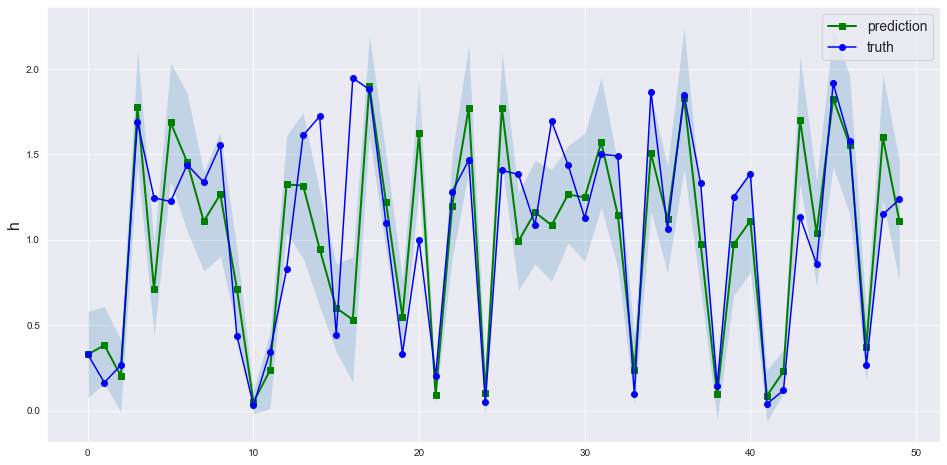

In [98]:
plt.figure(figsize=(16,8))
plt.plot(y_pred[:50], '-sg', linewidth=2, label='prediction')
plt.plot(y_test[:50], '-ob', label='truth')
plt.fill_between(xx, upper[:50],lower[:50], alpha=0.2)

plt.legend(fontsize=14)
plt.ylabel('h', fontsize=16)
#plt.savefig()
plt.show()

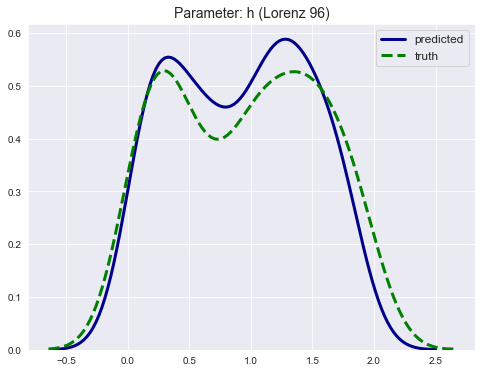

In [99]:
plt.figure(figsize=(8,6))

sns.distplot(y_pred, hist=False, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3}, label='predicted')

sns.distplot(y_test, hist=False, kde=True, 
             bins=int(180/5), color = 'green', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 3, 'linestyle': '--'}, label='truth')

plt.title('Parameter: h (Lorenz 96)', fontsize=14)
plt.legend(fontsize=12)
#plt.savefig('h_t_50_i_40_layers_24_12_6.pdf')
plt.show()

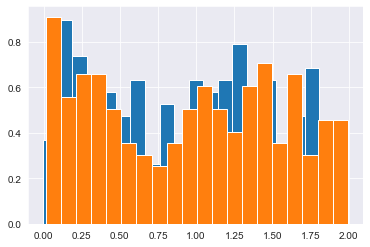

In [100]:
hist_pred = plt.hist(y_pred, bins=20, normed=True)
hist_test = plt.hist(y_test, bins=20, normed=True)

density, bins, patches = hist_pred
widths = bins[1:] - bins[:-1]
pdf_pred = (density * widths).sum()

density, bins, patches = hist_test
widths = bins[1:] - bins[:-1]
pdf_test = (density * widths).sum()


In [101]:
kl(pdf_pred, pdf_test)

0.0

In [102]:
print(sklearn.metrics.mean_squared_error(y_test, y_pred, sample_weight=None, multioutput='uniform_average'))
print(sklearn.metrics.mean_absolute_error(y_test, y_pred, sample_weight=None, multioutput='uniform_average'))
print(sklearn.metrics.r2_score(y_test, y_pred, sample_weight=None, multioutput='uniform_average'))
print(sklearn.metrics.normalized_mutual_info_score(y_test, y_pred, average_method='arithmetic'))

0.10859140341085499
0.24223312164733912
0.694632666770416
1.0


In [103]:
h = y_pred[1]
b = b_[0]
c = c_[0]

l96_ref = L96TwoLevel(K=K, J=J, X_init=X0, Y_init=Y0, h=h, c=c, b=b, save_dt=dt, noYhist=False)
l96_ref.iterate(t)
    
out = l96_ref.history
gp_x = out.X.values
gp_x.shape


(4201, 4)

In [105]:
h = y_test[1]
b = b_[0]
c = c_[0]

l96_ref = L96TwoLevel(K=K, J=J, X_init=X0, Y_init=Y0, h=h, c=c, b=b, save_dt=dt, noYhist=False)
l96_ref.iterate(t)
    
out = l96_ref.history

gp_x_ = out.X.values
gp_x_.shape



(4201, 4)

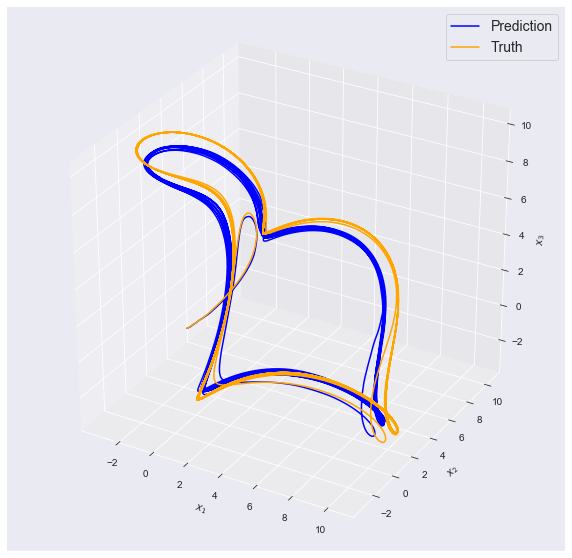

In [106]:
from_to = range(4000)

fig = plt.figure(figsize=(10,10))



ax = fig.add_subplot(1, 1, 1, projection='3d')
ax.plot(gp_x[from_to,0],gp_x[from_to,1], gp_x[from_to,2], 'blue', markersize=3,  label='Prediction')
ax.plot(gp_x_[from_to,0],gp_x_[from_to,1], gp_x_[from_to,2], 'orange', markersize=3, label='Truth')
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
ax.set_zlabel('$x_3$')
ax.legend(fontsize=14)
#plt.title('Pred')

# ax = fig.add_subplot(1, 2, 2, projection='3d')
# ax.plot(x_[:,0],x_[:,1], x_[:,2], '.b')
# ax.set_xlabel('$x_1$')
# ax.set_ylabel('$x_2$')
# ax.set_zlabel('$x_3$')
# plt.title('Truth')

plt.show()

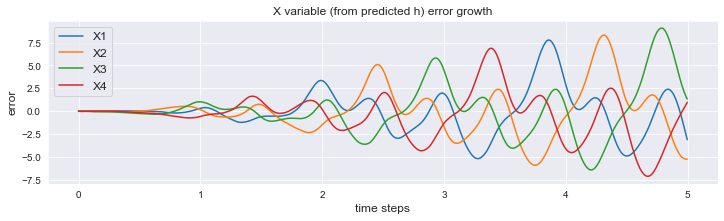

In [109]:
from_to = np.arange(1000)
mtu = np.arange(0,1000)*dt

plt.figure(figsize=(12,3))

plt.plot(mtu, gp_x[from_to,0]-gp_x_[from_to,0], label='X1')
plt.plot(mtu, gp_x[from_to,1]-gp_x_[from_to,1], label='X2')
plt.plot(mtu, gp_x[from_to,2]-gp_x_[from_to,2], label='X3')
plt.plot(mtu, gp_x[from_to,3]-gp_x_[from_to,3], label='X4')
plt.ylabel('error', fontsize=12)
plt.xlabel('time steps', fontsize=12)
plt.title('X variable (from predicted h) error growth')
plt.legend(fontsize=12)
plt.show()